In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm 
from iminuit import Minuit
from iminuit.cost import LeastSquares
import pandas as pd
import sympy as sp
from sympy import symbols, diff, lambdify, solve 
from numpy.linalg import inv
from scipy.integrate import quad
r = np.random
plt.rcParams['figure.figsize'] = [10, 10]


# 1.1

In [24]:
p = 18/37
n= 25
N = 5000
1-(1-(1-p)**n)**N
#Brug det her, dakke dakke

0.00029020434786275473

# 1.2

In [25]:
# Tag integralet 1.2sigma til 2.5sigma, brug f.eks. mu = 0, sigma = 1
p1 = norm.cdf(1.2)  # CDF at z = 1.2
p2 = norm.cdf(2.5)
p2-p1 #så ca. 10.88%

0.10886000489593206

# 1.3

In [26]:
# Poisson
p_criticalday = 22/365
# aner ikke herfra?

# 2.1

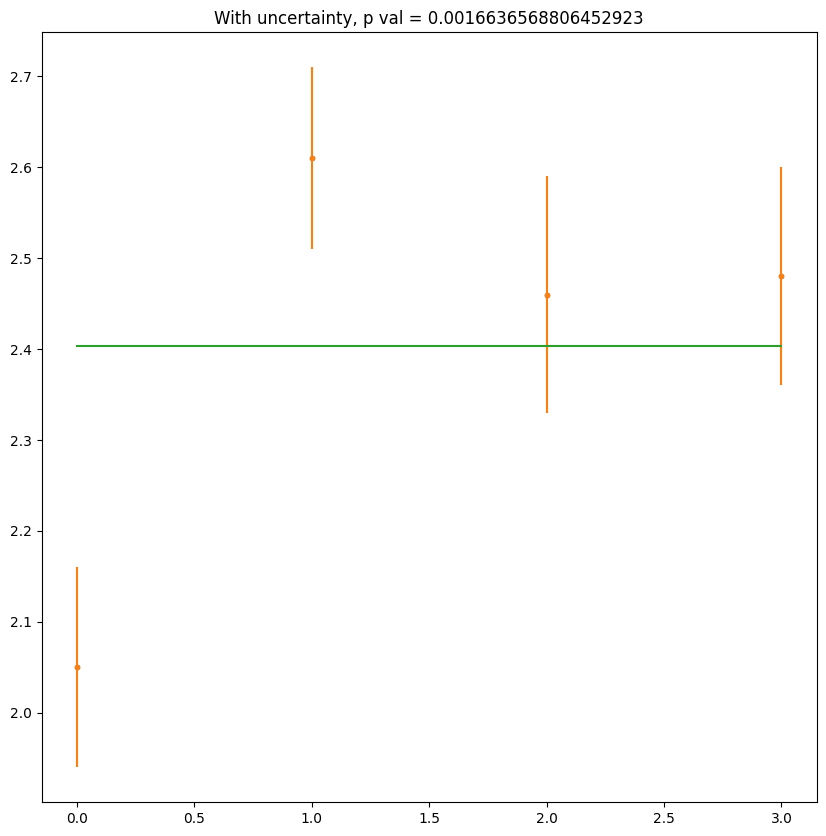

Text(0.5, 1.0, 'Without uncertainty, p val = 0.3636432205168262')

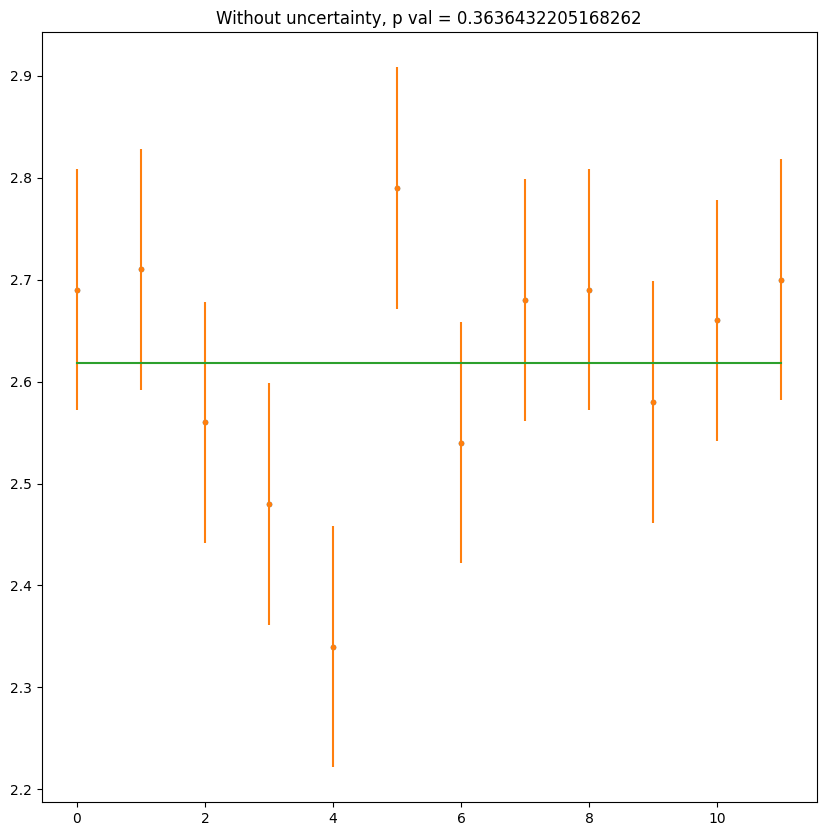

In [27]:
with_unc = np.array([2.05,2.61,2.46,2.48])
with_unc_err = np.array([0.11,0.1,0.13,0.12])
without_unc = np.array([2.69,2.71,2.56,2.48,2.34,2.79,2.54,2.68,2.69,2.58,2.66,2.7])
plt.plot(with_unc,'.')
plt.errorbar(np.arange(len(with_unc)),with_unc,yerr=with_unc_err,fmt='.')
def straight_line(x, a):
    return a +x-x
sy = with_unc_err
chi2 = LeastSquares(np.arange(len(with_unc)), with_unc, sy,straight_line)
m = Minuit(chi2, a=1)
m.migrad()
plt.title(f'With uncertainty, p val = {1-stats.chi2.cdf(m.fval,len(with_unc)-1)}')
plt.plot(np.arange(len(with_unc)),straight_line(np.arange(len(with_unc)),m.values['a']))

# clearly the ones with error do not agree
plt.show()
plt.plot(without_unc,'.')
err = np.std(without_unc)
plt.errorbar(np.arange(len(without_unc)),without_unc,yerr=err,fmt='.')
chi2 = LeastSquares(np.arange(len(without_unc)), without_unc, err,straight_line)
m = Minuit(chi2, a=1)
m.migrad()
plt.plot(np.arange(len(without_unc)),straight_line(np.arange(len(without_unc)),m.values['a']))
plt.title(f'Without uncertainty, p val = {1-stats.chi2.cdf(m.fval,len(without_unc)-1)}')


In [28]:
# Best is the one without, and we can take the mean and RMSE
rmse = np.std(without_unc)/np.sqrt(len(without_unc))
mean = np.mean(without_unc)
print("The best value is", mean,"+-",rmse,"cm")

The best value is 2.6183333333333336 +- 0.0341531138431796 cm


# 2.2

In [29]:
# Første del, bare ophobningslov
#Anden del:

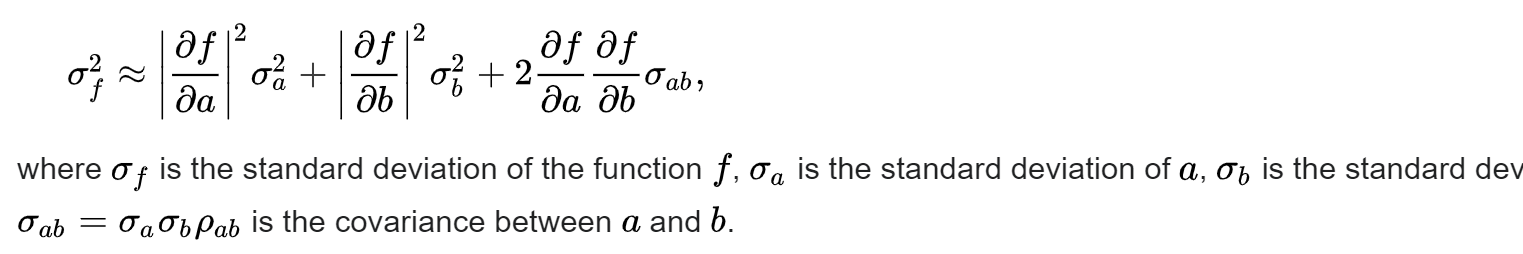

Brug ovenstående

# 3.1

In [30]:
def f(x,a):
    C = 0.662
    return C*(1-np.exp(-a*x))
#Both transformation and hit and miss can technically be used, but the transformation requires the inverse function to be possible to find. As such, hit and miss will be used.
#The mean is the integral from 0 to 2 of f(x)*x

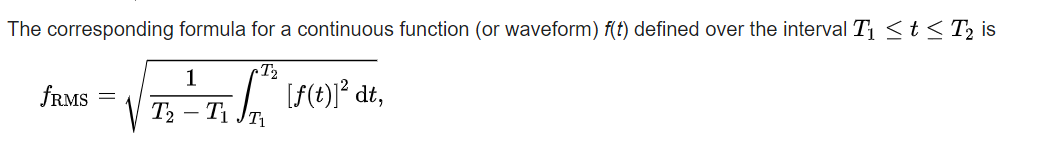

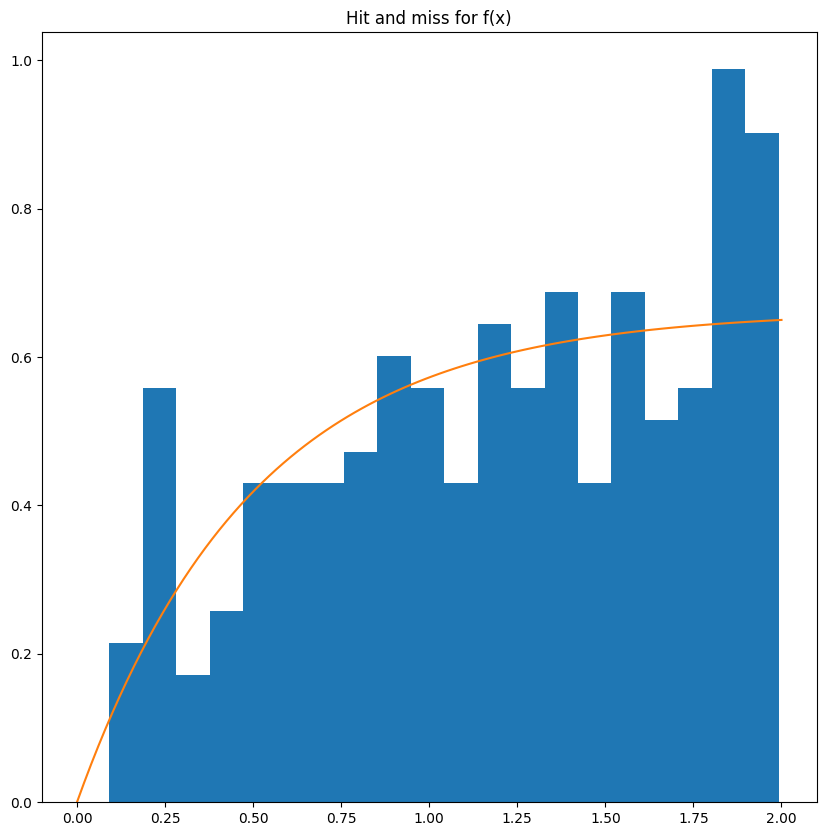

Text(0.5, 1.0, 'Fit of f(x), a = 2.000')

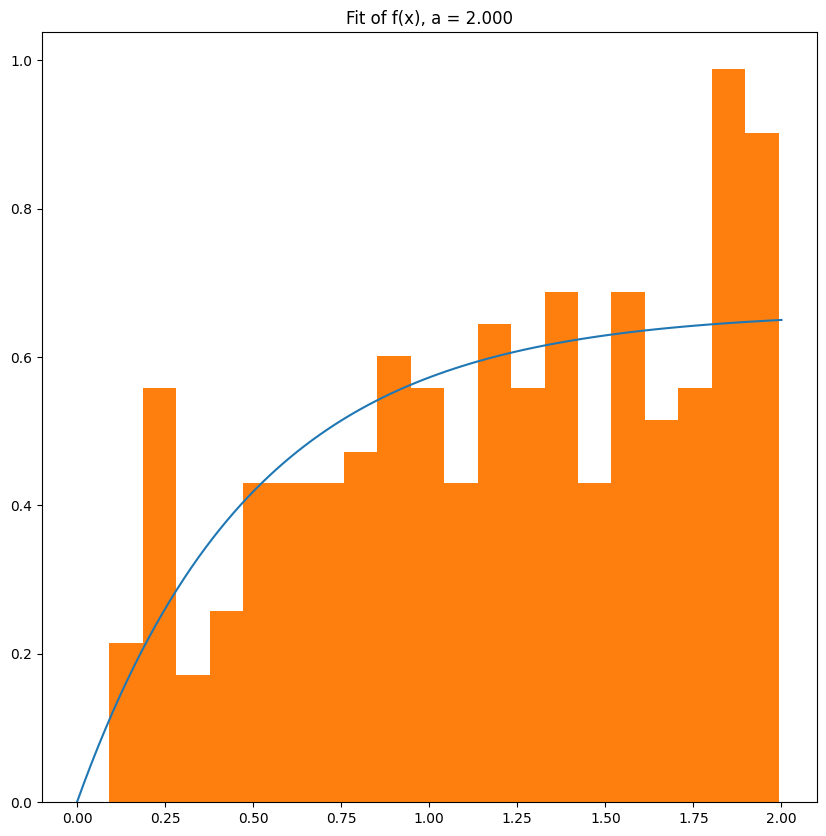

In [31]:
#As such the RMS is 0.52
#The mean is 1.17
N = 1000
xran = r.uniform(0,2,N)
ydef = f(xran,2)
yran = r.uniform(0,2,N)
mask = yran < ydef
plt.hist(xran[mask],bins=20, density = True)
plt.plot(np.linspace(0,2,100),f(np.linspace(0,2,100),2))
plt.title("Hit and miss for f(x)")
plt.show()
chi2 = LeastSquares(xran[mask],ydef[mask],0.1,f)
m = Minuit(chi2, a=1)
m.migrad()
plt.plot(np.linspace(0,2,100),f(np.linspace(0,2,100),m.values['a']))
plt.hist(xran[mask],bins=20, density = True)
plt.title(f"Fit of f(x), a = {m.values['a']:.3f}")

(array([  3.,   7.,  42., 100., 154., 222., 218., 144.,  80.,  30.]),
 array([1.86029024, 2.56215487, 3.2640195 , 3.96588413, 4.66774875,
        5.36961338, 6.07147801, 6.77334264, 7.47520727, 8.1770719 ,
        8.87893652]),
 <BarContainer object of 10 artists>)

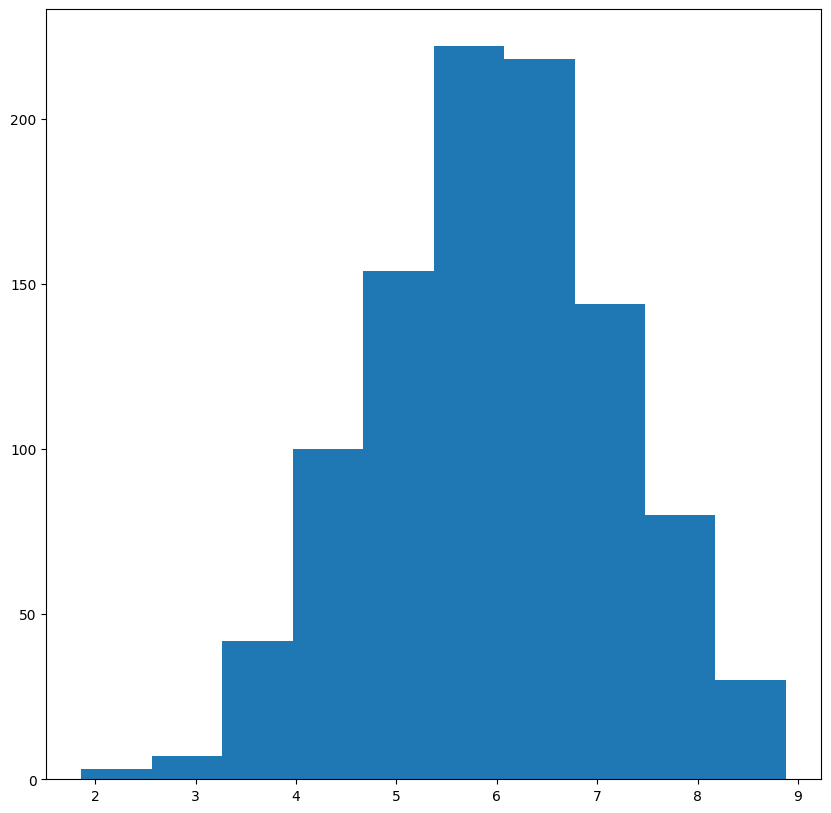

In [32]:
xran = r.uniform(0,2,N)
ydef = f(xran,2)
yran = r.uniform(0,2,N)
mask = yran < ydef
ulist = []
for i in range(1000):
    ulist.append(np.sum(r.choice(xran[mask],size = 5)))
plt.hist(ulist)
# Brug det fra 2016, det er en gaus bla bla

# 4.1

# 4.2

p val is 0.0


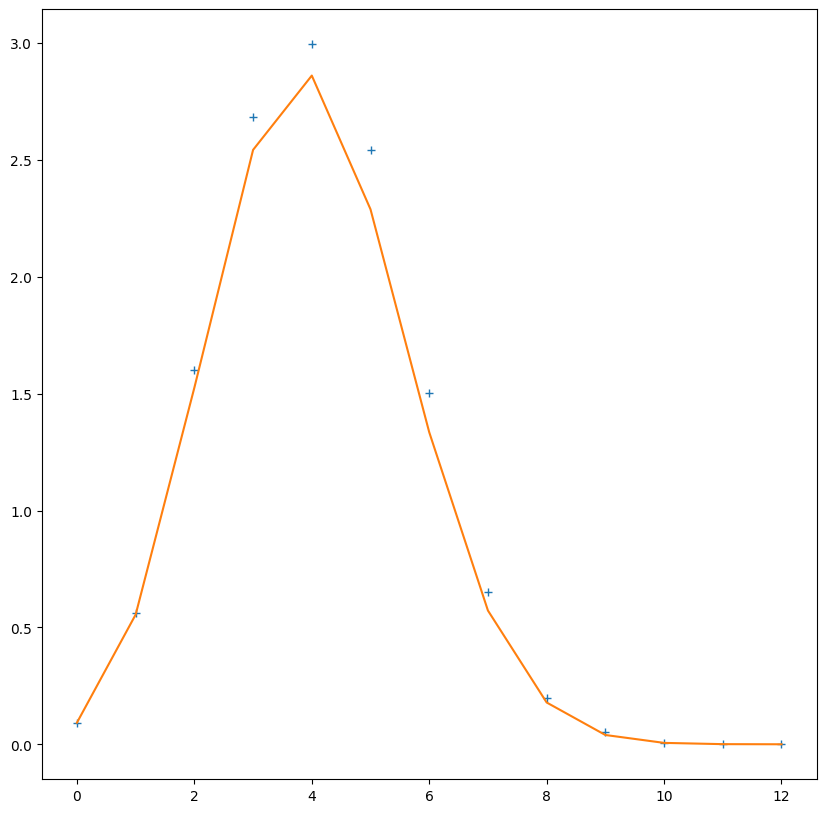

In [33]:
number56 = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12])
observed56 = np.array([185,1149,3265,5475,6114,5194,3067,1331,403,105,14,4,0])
plt.plot(number56,observed56*0.0004899,'+')
#Definitely binomial
def binomial(x,A,p):
    return A*12*stats.binom.pmf(x,12,p)
plt.plot(number56,binomial(number56,1,1/3))
def chi2(x,A,p):
    return np.sum((observed56-binomial(x,A,p))**2/binomial(x,A,p))
print("p val is",stats.chi2.sf(chi2(number56,1,1/3),len(number56)))
#so it isn't accepted

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = inf (χ²/ndof = inf)        │              Nfcn = 642              │
│ EDM = nan (Goal: 0.0002)         │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

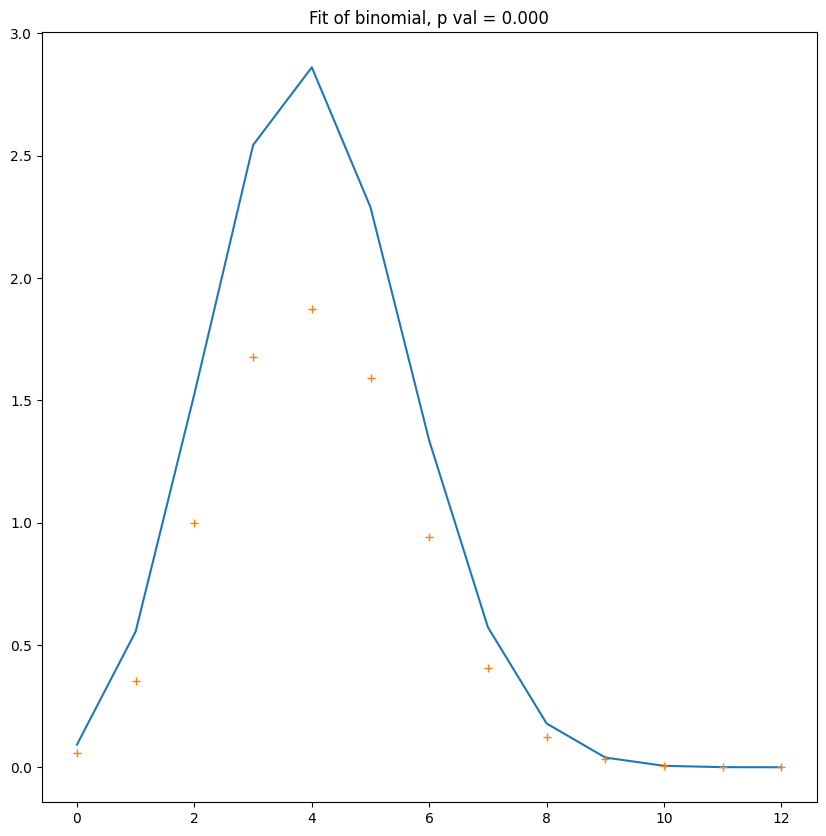

In [34]:
def binomial(x,p):
    return 12*stats.binom.pmf(x,12,p)
chi24 = LeastSquares(number56, observed56/observed56[2], np.sqrt(observed56),binomial)
m = Minuit(chi24,p=1/3)
m.limits['p'] = (0,1)
m.migrad()
plt.plot(number56,binomial(number56,*m.values))
plt.plot(number56,observed56/observed56[2],'+')
plt.title(f'Fit of binomial, p val = {1-stats.chi2.cdf(m.fval,len(number56)-2):.3f}')
print(m.migrad())
#idk fix somehow i can't be bothered at this point

# 5.1

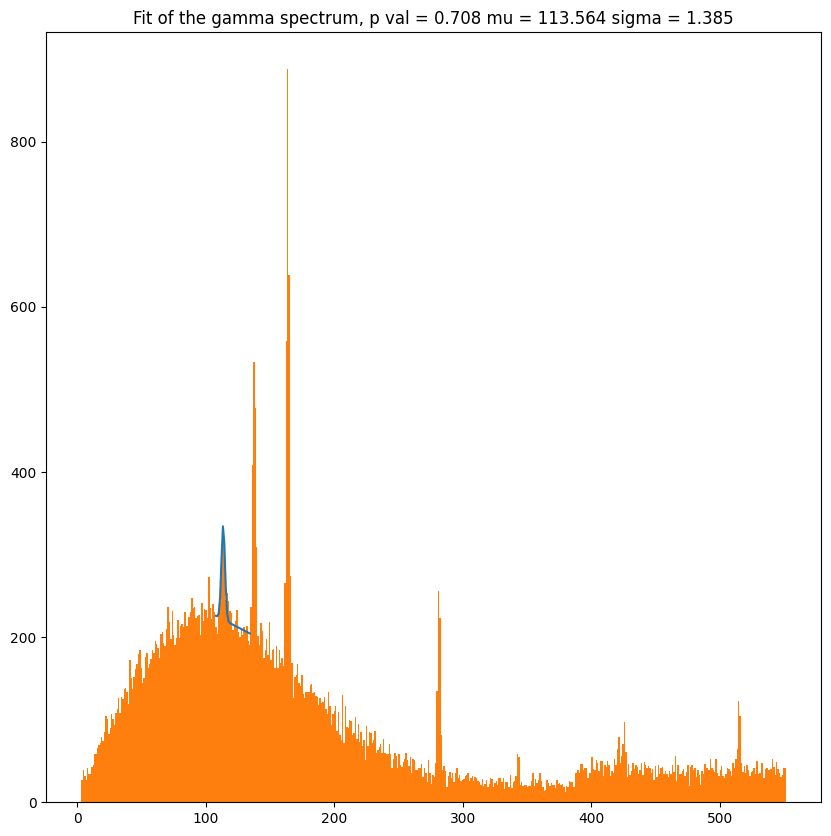

<ValueView A=114.14661849064238 mu=113.56394919230036 sigma=1.3846491665236997 B=0.8078733445740927 c=312.8904833464168>
<ErrorView A=15.823523534665853 mu=0.19619534567587932 sigma=0.2697006687040783 B=0.46614545347432657 c=58.13066552720348>


In [171]:
filename = "data_GammaSpectrum.txt"
    
# Load time and position, set starting time to 0, and assign uncertainty:
channel_number = np.loadtxt(filename, unpack=True)
# plt.hist(channel_number,bins=300)
# plt.xlabel("Channel number")
# plt.ylabel("Counts")
# plt.show()
# def doublegauss(x,A,mu,sigma1,sigma2,f):
#     return A*(f*np.exp(-(x-mu)**2/(2*sigma1**2))+(1-f)*np.exp(-(x-mu)**2/(2*sigma2**2)))
# def gauss(x,mu,sigma,A):
#     return A*np.exp(-(x-mu)**2/(2*sigma**2))
def gauslin(x,A,mu,sigma,B,c):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))-B*x+c
start = 95
stop = 120
counts,bins = np.histogram(channel_number,bins=500)
binwidth = bins[1]-bins[0]
bins = (bins[1:]+bins[:-1])/2
mask = counts > 0
bins = bins[mask]
counts = counts[mask]
chi2double = LeastSquares(bins[start:stop],counts[start:stop],np.sqrt(counts[start:stop]),gauslin)
m = Minuit(chi2double,A=binwidth*len(counts[start:stop]),mu=113,sigma=0.01,B=1,c = 1)
m.limits['B'] = (-10,10)
m.migrad()

plt.plot(bins[start:stop],gauslin(bins[start:stop],*m.values))
plt.hist(channel_number,bins=500)
plt.title(f'Fit of the gamma spectrum, p val = {1-stats.chi2.cdf(m.fval,len(bins[start:stop])-5):.3f} mu = {m.values["mu"]:.3f} sigma = {m.values["sigma"]:.3f}')
plt.show()
print(m.values)
print(m.errors)
mu1 = m.values['mu']
mu1err = m.errors['mu']

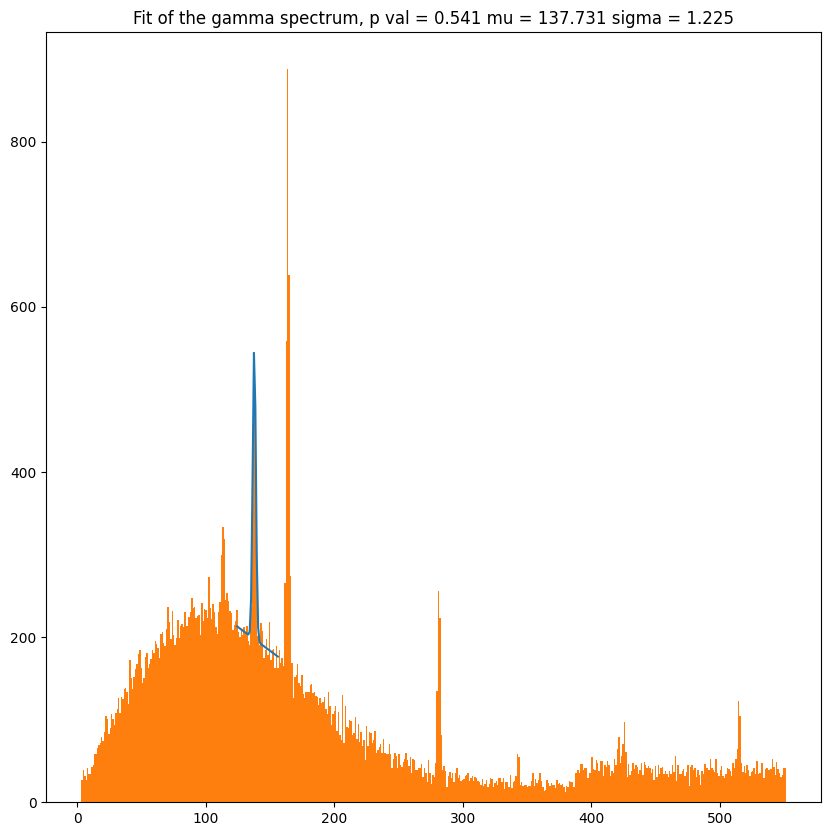

<ValueView A=354.7332490039465 mu=137.73136180686615 sigma=1.2248802344280723 B=1.1526470292006472 c=356.3210140234311>
<ErrorView A=18.73144740886601 mu=0.06751264603501556 sigma=0.05894802348402148 B=0.2715536526176896 c=38.52319289461764>


In [172]:
start = 110
stop = 140
counts,bins = np.histogram(channel_number,bins=500)
binwidth = bins[1]-bins[0]
bins = (bins[1:]+bins[:-1])/2
mask = counts > 0
bins = bins[mask]
counts = counts[mask]
chi2double = LeastSquares(bins[start:stop],counts[start:stop],np.sqrt(counts[start:stop]),gauslin)
m = Minuit(chi2double,A=binwidth*len(counts[start:stop]),mu=130,sigma=0.4,B=6,c = 1)
m.limits['B'] = (-10,10)
m.migrad()

plt.plot(bins[start:stop],gauslin(bins[start:stop],*m.values))
plt.hist(channel_number,bins=500)
plt.title(f'Fit of the gamma spectrum, p val = {1-stats.chi2.cdf(m.fval,len(bins[start:stop])-5):.3f} mu = {m.values["mu"]:.3f} sigma = {m.values["sigma"]:.3f}')
plt.show()
print(m.values)
print(m.errors)
mu2 = m.values['mu']
mu2err = m.errors['mu']

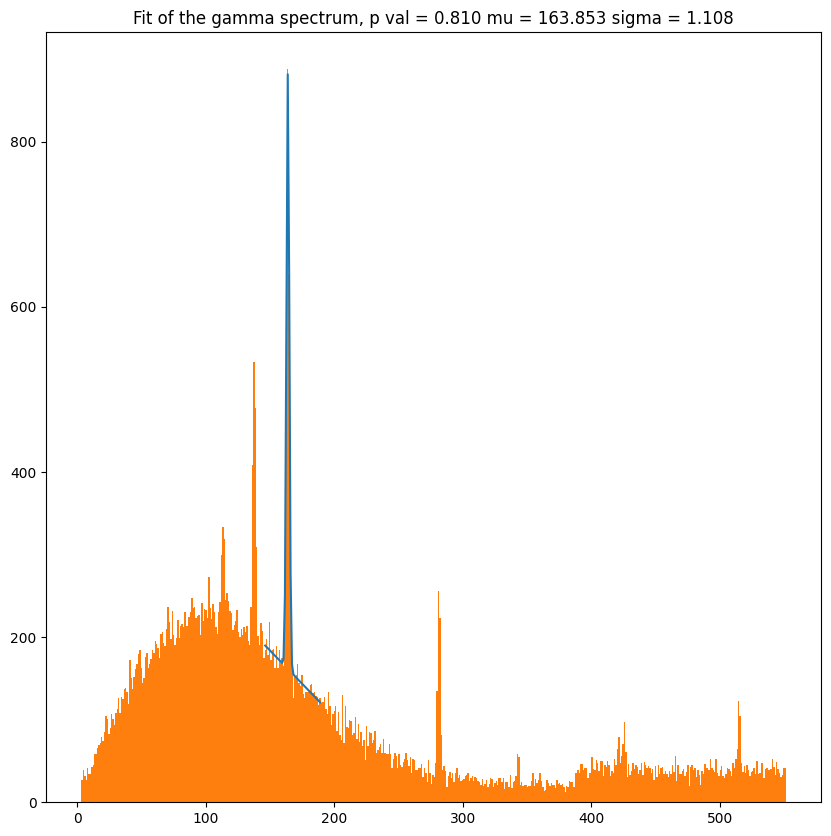

<ValueView A=722.243309090538 mu=163.853008975223 sigma=1.1080660544238405 B=1.6086739919102868 c=424.98934016426176>
<ErrorView A=24.99231413627757 mu=0.035901672841681824 sigma=0.032748442421539466 B=0.1580227328551187 c=26.962962081511016>


In [173]:
start = 130
stop = 170
counts,bins = np.histogram(channel_number,bins=500)
binwidth = bins[1]-bins[0]
bins = (bins[1:]+bins[:-1])/2
mask = counts > 0
bins = bins[mask]
counts = counts[mask]
chi2double = LeastSquares(bins[start:stop],counts[start:stop],np.sqrt(counts[start:stop]),gauslin)
m = Minuit(chi2double,A=800,mu=163,sigma=0.001,B=1,c = 0.8)
m.limits['B'] = (-10,10)
m.limits['A'] = (0,None)
m.migrad()

plt.plot(bins[start:stop],gauslin(bins[start:stop],*m.values))
plt.hist(channel_number,bins=500)
plt.title(f'Fit of the gamma spectrum, p val = {1-stats.chi2.cdf(m.fval,len(bins[start:stop])-5):.3f} mu = {m.values["mu"]:.3f} sigma = {m.values["sigma"]:.3f}')
plt.show()
print(m.values)
print(m.errors)
mu3 = m.values['mu']
mu3err = m.errors['mu']

In [174]:
E1 = 242
E2 = 295
E3 = 352
reldistE = (E3-E2)/(E2-E1)
relmu = (mu3-mu2)/(mu2-mu1)
print(f'The relative distance between the energies is {reldistE:.3f}, while the relative distance between the peaks is {relmu:.3f}')
print("Brug ophobning på relative afstand, og få usikkerheden. Gider ikke")

The relative distance between the energies is 1.075, while the relative distance between the peaks is 1.081
Brug ophobning på relative afstand, og få usikkerheden. Gider ikke


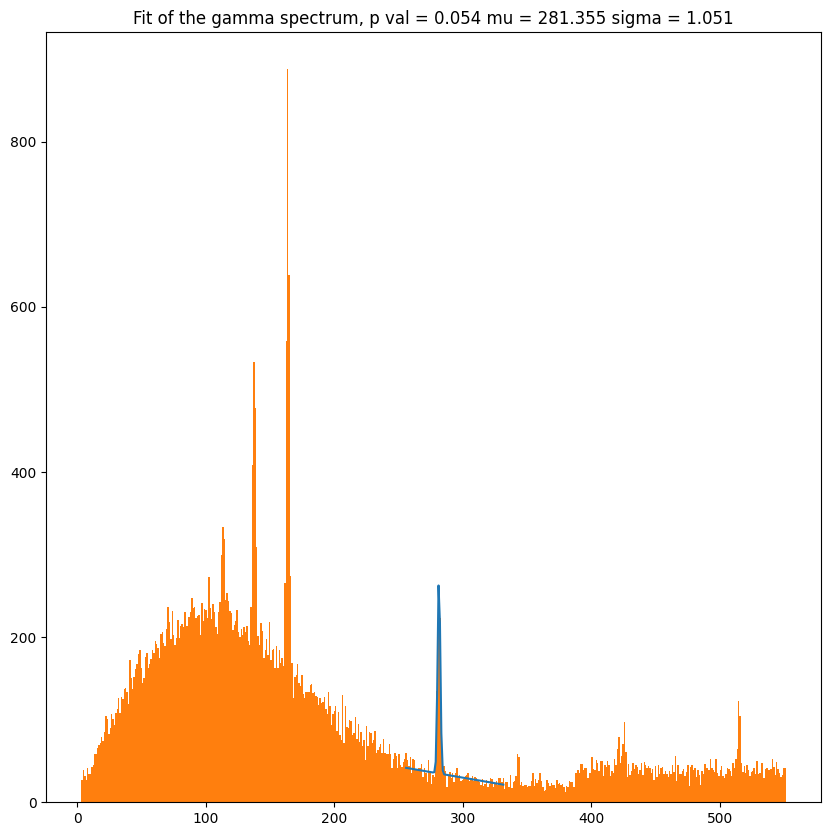

<ValueView A=238.77542840015218 mu=281.3549233907148 sigma=1.0512770291471454 B=0.2691241568993057 c=110.5343691448206>
<ErrorView A=14.345884771734731 mu=0.057089044837567826 sigma=0.049560297355580686 B=0.03151082799918381 c=9.443771363609715>


In [175]:
#Til Bismuth
start = 230
stop = 300
counts,bins = np.histogram(channel_number,bins=500)
binwidth = bins[1]-bins[0]
bins = (bins[1:]+bins[:-1])/2
mask = counts > 0
bins = bins[mask]
counts = counts[mask]
chi2double = LeastSquares(bins[start:stop],counts[start:stop],np.sqrt(counts[start:stop]),gauslin)
m = Minuit(chi2double,A=binwidth*len(counts[start:stop]),mu=282,sigma=0.2,B=6,c = 1)
m.limits['B'] = (-10,10)
m.limits['mu'] = (start,stop)
m.limits['A'] = (50,None)
m.migrad()

plt.plot(bins[start:stop],gauslin(bins[start:stop],*m.values))
plt.hist(channel_number,bins=500)
plt.title(f'Fit of the gamma spectrum, p val = {1-stats.chi2.cdf(m.fval,len(bins[start:stop])-5):.3f} mu = {m.values["mu"]:.3f} sigma = {m.values["sigma"]:.3f}')
plt.show()
print(m.values)
print(m.errors)
mubis1 = m.values['mu']
mubis1err = m.errors['mu']

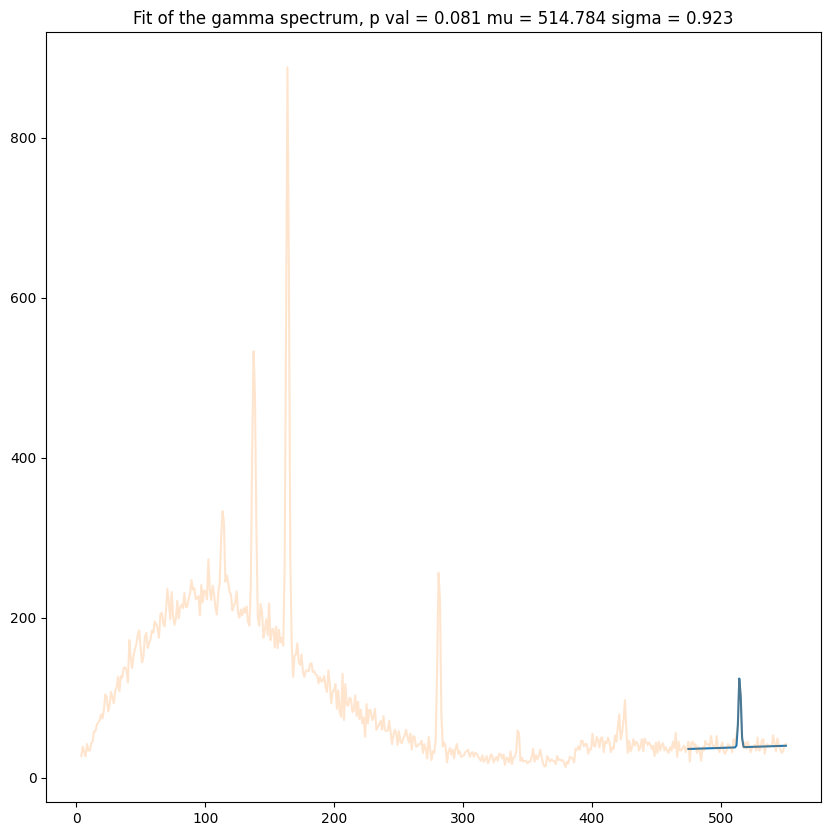

In [176]:
#Til Bismuth
start = 430
stop = 530
counts,bins = np.histogram(channel_number,bins=500)
binwidth = bins[1]-bins[0]
bins = (bins[1:]+bins[:-1])/2
mask = counts > 0
bins = bins[mask]
counts = counts[mask]
chi2double = LeastSquares(bins[start:stop],counts[start:stop],np.sqrt(counts[start:stop]),gauslin)
m = Minuit(chi2double,A=binwidth*len(counts[start:stop]),mu=514,sigma=0.7,B=0,c = counts[start])
m.limits['B'] = (-10,10)
m.limits['mu'] = (start,stop)
m.limits['A'] = (50,None)
m.limits['sigma'] = (0.001,1)
m.migrad()

plt.plot(bins[start:stop],gauslin(bins[start:stop],*m.values))
plt.plot(bins,counts, '-', alpha = 0.2)
#plt.hist(channel_number,bins=500)
plt.title(f'Fit of the gamma spectrum, p val = {1-stats.chi2.cdf(m.fval,len(bins[start:stop])-5):.3f} mu = {m.values["mu"]:.3f} sigma = {m.values["sigma"]:.3f}')
plt.show()
mubis2 = m.values['mu']
mubis2err = m.errors['mu']

<ErrorbarContainer object of 3 artists>

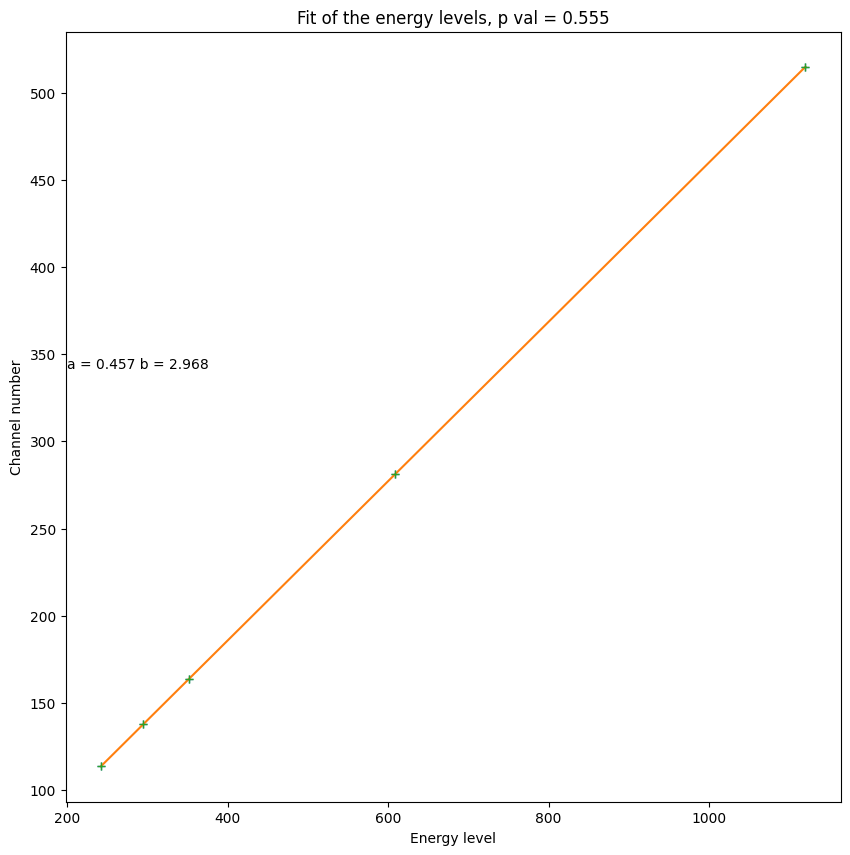

In [186]:
def linfit(x,a,b):
    return a*x+b
Elevels = np.array([242,295,352,609,1120])
Mus = np.array([mu1,mu2,mu3,mubis1,mubis2])
Muserr = np.array([mu1err,mu2err,mu3err,mubis1err,mubis2err])
plt.plot(Elevels,Mus,'+')
chi2 = LeastSquares(Elevels,Mus,Muserr,linfit)
m = Minuit(chi2,a=1,b=1)
m.migrad()
plt.plot(Elevels,linfit(Elevels,*m.values))
plt.title(f'Fit of the energy levels, p val = {1-stats.chi2.cdf(m.fval,len(Mus)-2):.3f}')
plt.text(200,342,f"a = {m.values['a']:.3f} b = {m.values['b']:.3f}")
plt.ylabel("Channel number")
plt.xlabel("Energy level")
plt.errorbar(Elevels,Mus,Muserr,fmt='+')


In [ ]:
# Nu har man fit parametrerne, så man kan oversætte fra kanal til energi
#kig på bredden af peaket, burde være nemt
#Kig derefter på histogrammet og se, om der er et peak ved kanalnummer 300 og måske lidt over 420?. Burde være det..
